# Neural network with Backpropagation with ReLU and Sigmoid activations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs

In [2]:
def initialize_parameters(layers_dims):
    # The input is an array of numbers indicating how many nodes in the layers
    
    parameters = {}
    
    for l in range(1,len(layers_dims)):
        parameters["W" + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1] )*0.01
        parameters["b" + str(l)] = np.zeros((layers_dims[l],1))
    
    # This pulls numbers with a normal distribution with a variance of 100^2 and a mean of 0
    # Saves the parameters
    
    return parameters



def forward_prop(X,parameters):
    """
    Forward propagation for a neural network architecture like:
        [LINEAR --> RELU]*(L-1) -> LINEAR -> SIGMOID
    parameters is a dictionary with W's and b's
    X is the input
    """
    caches = []
    A = X
    L = len(parameters) // 2
    
    for l in range(1,L):
        A_prev = A
        
        W = parameters["W"+str(l)]
        b = parameters["b"+str(l)]
        
        Z = np.dot(W,A_prev) + b
        A = np.maximum(Z,0)
        
        caches.append((A_prev,W,b,Z))
        
    A_prev = A
    W = parameters['W' + str(L)]
    b = parameters['b' + str(L)]
    
    Z = np.dot(W,A_prev) + b
    AL = 1/(1+np.exp(-Z))
    
    caches.append((A_prev,W,b,Z))
    
    return AL, caches


def compute_cost(AL, Y):
    
    m = Y.shape[1]
    cost = (-1/m)* np.sum(np.dot(Y,np.log(AL).T)+np.dot((1-Y),np.log(1-AL).T))
    cost = np.squeeze(cost) 
    
    return cost


def one_back_prop(dA, cache, activation):
    A_prev, W, b, Z = cache
    m = A_prev.shape[1]
    
    if activation == "relu":
        dZ = np.array(dA, copy = True)
        dZ[Z<= 0 ] = 0
    elif activation == "sigmoid":
        s = 1/(1+np.exp(-Z))
        dZ = dA * s * (1-s)
        
    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1, keepdims= True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

def back_propagation(AL,Y,caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = -(np.divide(Y,AL) - np.divide(1- Y , 1-AL))
        
    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = one_back_prop(dAL, current_cache, "sigmoid")
    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp
    
    for l in reversed(range(L-1)):
        dA_prev_temp, dW_temp, db_temp = one_back_prop(dA_prev_temp, caches[l], "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l+1)] = dW_temp
        grads["db" + str(l+1)] = db_temp
    return grads
    
def update_parameters(params, grads, learning_rate):
    
    parameters = params.copy()
    L = len(parameters) // 2
    
    for l in range(L):
        parameters["W" + str(l+1)] = params["W"+str(l+1)] - learning_rate*grads["dW"+str(l+1)]
        parameters["b" + str(l+1)] = params["b"+str(l+1)] - learning_rate*grads["db"+str(l+1)]
        
    return parameters

(2, 600)
(1, 600)
(2, 400)
(1, 400)


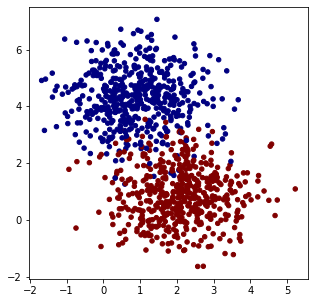

In [3]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)

y = y.reshape((1000, 1))

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

X_train = X[0:600].T
y_train = y[0:600].T

X_test = X[600:1000].T
y_test = y[600:1000].T

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


In [4]:
# Two layer model:

def model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 1000):
    
    costs = []
    m = X.shape[1]
    
    parameters =initialize_parameters(layers_dims)
    
    for i in range(0, num_iterations):
        
        AL, caches = forward_prop(X,parameters)
        
        cost = compute_cost(AL, Y)
        
        grads = back_propagation(AL,Y,caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        costs.append(cost)
        if i%100 == 0:
            
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    return parameters, costs
        

Cost after iteration 0: 0.6931455331301658
Cost after iteration 100: 0.6928778743484202
Cost after iteration 200: 0.6928696320835481
Cost after iteration 300: 0.6928659334483015
Cost after iteration 400: 0.6928596781706907
Cost after iteration 500: 0.6928475213520475
Cost after iteration 600: 0.6928202472779503
Cost after iteration 700: 0.6927453794578882
Cost after iteration 800: 0.6924569168572189
Cost after iteration 900: 0.6902367399951224
Cost after iteration 1000: 0.5327760248633064
Cost after iteration 1100: 0.21512818240222137
Cost after iteration 1200: 0.1464305787220451
Cost after iteration 1300: 0.12322417336998064
Cost after iteration 1400: 0.11237873593540533
Cost after iteration 1500: 0.10702418347132475
Cost after iteration 1600: 0.1041258446097399
Cost after iteration 1700: 0.10246000873731746
Cost after iteration 1800: 0.10146077071223691
Cost after iteration 1900: 0.10083757833965228
Cost after iteration 2000: 0.10043560771624514
Cost after iteration 2100: 0.100165753

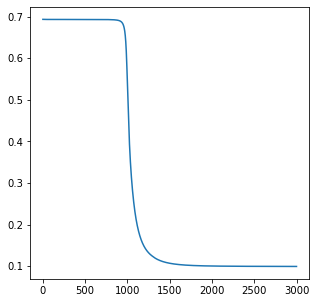

In [5]:

layers_dims = (2,7,8,1)
learning_rate = 0.0075



parameters, costs = model(X_train, y_train, layers_dims,learning_rate = 0.075, num_iterations = 3000)


lst = list(range(1,3001))


plt.figure(figsize=(5,5))
plt.plot(lst, costs)
plt.show()



In [6]:
AL, caches = forward_prop(X_test,parameters)

cost = compute_cost(AL, y_test)

print(cost)

0.11610092412803827


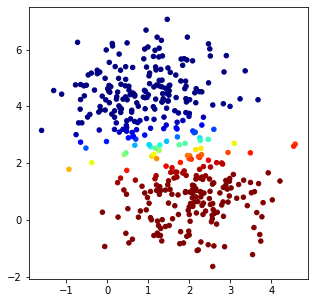

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(X_test.T[:,0], X_test.T[:,1], c=AL.T, s=20, cmap='jet')

In [8]:
round_off_values = np.round_(AL)

In [9]:
accuracy = round_off_values - y_test

print(np.sum(accuracy)/1000)



-0.008


## Creating a Visualizing Technique

In [10]:
from graphviz import Digraph

dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
i = 0


num_neurons = sum(layers_dims)

lst = list(range(1,num_neurons+1))
counter = 0


for n in layers_dims:
    
    for num in range(n):
        
        uid = str(lst[i])
        name = "Neuron"
        
        i+= 1
        dot.node(uid,name)

        if layers_dims.index(n) >= 1:
            for thing in range(1,layers_dims[layers_dims.index(n)-1]+1):
                dot.edge(str(int(uid)-counter-thing),uid)
        counter += 1
    counter = 0


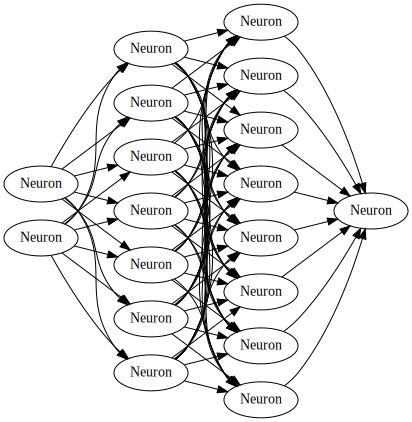

In [11]:
dot